**Tarea 2: Uso de la Transformada de Fourier en la Medición y Análisis de Vibración**

In [1]:
#Importación de módulos de cálculo y graficación
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

**Primera parte:** Algoritmo numérico de la DFT en Python y su normalización

(-180.0, 180.0)

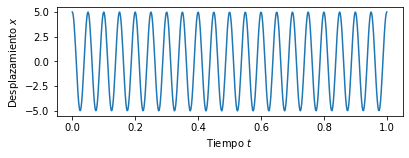

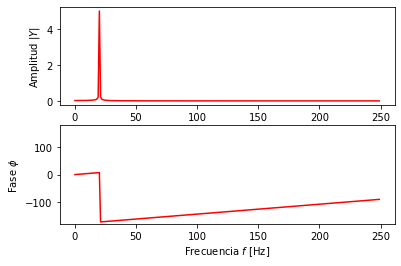

In [2]:
#1)Definición de la señal muestreada

#Características del dominio del tiempo
#Número de puntos
N = 500;
#Espaciamiento temporal
T = 1/N; 
#Vector de tiempo
t = np.linspace(0, N*T, N)  

#Características de la señal de prueba
#Frecuencia de la señal
f = 20;             
#Función de la señal de prueba
y = 5*np.cos(2*pi*f*t)   

#2)Cálculo de la transformada de Fourier

#Aplicación de la DFT
Y = np.fft.fft(y)
Y = Y[range(int((N/2)))]

#Determinación de las frecuencias
freq = np.fft.fftfreq(N, T)
freq = freq[range(int(N/2))]

#Determinación de la fase en grados
fase = np.arctan2(Y.imag, Y.real) * 180 / np.pi

#3)Graficación

#Señal en el tiempo
plt.figure(figsize=(6.2,2))
plt.plot(t, y)
plt.xlabel('Tiempo $t$')
plt.ylabel('Desplazamiento $x$')

#Espectro de frecuencia
fig, ax = plt.subplots(2, 1)
#Amplitud
#ATENCIÓN: Factor de normalización para el presente algoritmo es (2/N)
ax[0].plot(freq, (2/N) * np.abs(Y),'r') 
ax[0].set_ylabel('Amplitud |$Y$|')
#Fase
ax[1].plot(freq, fase, 'r')
ax[1].set_xlabel('Frecuencia $f$ [Hz]')
ax[1].set_ylabel('Fase $\phi$')
ax[1].set_ylim(-180, 180)

**Segunda parte:** Comparación entre método analítico y numérico de manipulación de señales con la DFT

(-180.0, 180.0)

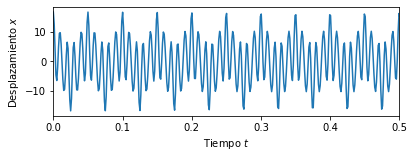

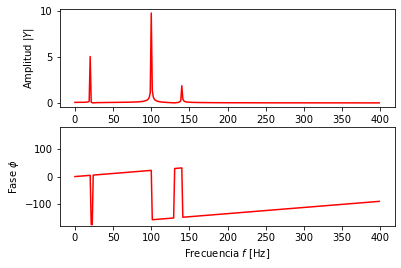

In [3]:
#1)Definición de la señal muestreada con tres componentes armónicas

#Características del dominio del tiempo
#Número de puntos
N = 600;
#Espaciamiento temporal
T = 1/800; 
#Vector de tiempo
t = np.linspace(0, N*T, N)

#Características de la señal de prueba
#Frecuencia natural de la señal
f = 20;                 
#Función de la señal de prueba
y = 5*np.cos(2*pi*f*t) + 10*np.cos(2*pi*(5*f)*t) + 2*np.cos(2*pi*(7*f)*t)

#2)Cálculo de la transformada de Fourier

#Aplicación de la DFT
Y = np.fft.fft(y)
Y = Y[range(int((N/2)))]

#Determinación de las frecuencias
freq = np.fft.fftfreq(N, T)
freq = freq[range(int(N/2))]

#Determinación de la fase en grados
fase = np.arctan2(Y.imag, Y.real) * 180 / np.pi

#3)Graficación

#Señal en el tiempo
plt.figure(figsize=(6.2,2))
plt.plot(t, y)
plt.xlabel('Tiempo $t$')
plt.ylabel('Desplazamiento $x$')
plt.xlim(0, 0.5)

#Espectro de frecuencia
fig, ax = plt.subplots(2, 1)
#Amplitud
#ATENCIÓN: Factor de normalización para el presente algoritmo es (2/N)
ax[0].plot(freq, (2/N) * np.abs(Y),'r') 
ax[0].set_ylabel('Amplitud |$Y$|')
#Fase
ax[1].plot(freq, fase, 'r')
ax[1].set_xlabel('Frecuencia $f$ [Hz]')
ax[1].set_ylabel('Fase $\phi$')
ax[1].set_ylim(-180, 180)

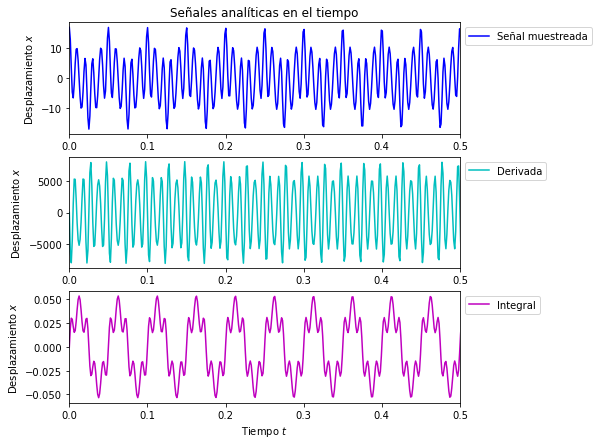

In [4]:
#4)Comparación analítica-numérica de la derivación e integración en el tiempo mediante la DFT

#Derivada analítica de la señal
y_der = -5*(2*pi*f)*np.sin(2*pi*f*t) -10*(2*pi*(5*f))*np.sin(2*pi*(5*f)*t) -2*(2*pi*(7*f))*np.sin(2*pi*(7*f)*t)

#Integral analítica de la señal
y_int = 5*(1/(2*pi*f))*np.sin(2*pi*f*t) +10*(1/(2*pi*(5*f)))*np.sin(2*pi*(5*f)*t) +2*(1/(2*pi*(7*f)))*np.sin(2*pi*(7*f)*t)

#Gráfica de las señales en el tiempo
fig, ax = plt.subplots(3, 1, figsize=(7,7))

#Señal muestreada
ax[0].plot(t, y, 'b', label='Señal muestreada')
ax[0].set_title('Señales analíticas en el tiempo')
ax[0].set_ylabel('Desplazamiento $x$')
ax[0].set_xlim(0, 0.5)
ax[0].legend(bbox_to_anchor=(1,1), loc=2)

#Derivada
ax[1].plot(t, y_der, 'c', label='Derivada')
ax[1].set_ylabel('Desplazamiento $x$')
ax[1].set_xlim(0, 0.5)
ax[1].legend(bbox_to_anchor=(1,1), loc=2)

#Integral
ax[2].plot(t, y_int, 'm', label='Integral')
ax[2].set_xlabel('Tiempo $t$')
ax[2].set_ylabel('Desplazamiento $x$')
ax[2].set_xlim(0, 0.5)
ax[2].legend(bbox_to_anchor=(1,1), loc=2)

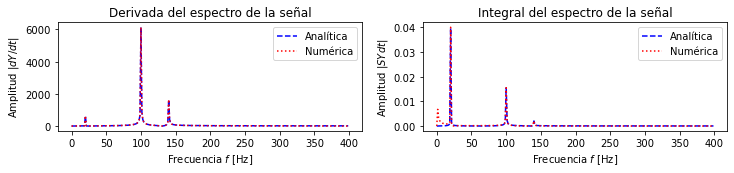

In [5]:
#a) Cálculo analítico de los espectros de las señales derivada e integral
#Señal derivada
Y_DER = np.fft.fft(y_der)
Y_DER = Y_DER[range(int((N/2)))]
fase_DER = np.arctan2(Y_DER.imag, Y_DER.real) * 180 / np.pi

#Señal integral
Y_INT = np.fft.fft(y_int)
Y_INT = Y_INT[range(int((N/2)))]
fase_INT = np.arctan2(Y_INT.imag, Y_INT.real) * 180 / np.pi

#b) Cálculo numérico (mediante las propiedades de la DFT) de los espectros
#Señal derivada
YNUM_DER = np.zeros_like(Y)
for n in range(0, int(N/2), 1):
    YNUM_DER[n] = (1j*2*pi*freq[n])*Y[n]

#Señal integral
YNUM_INT = np.zeros_like(Y)
for n in range(1, int(N/2), 1):
    YNUM_INT[n] = (1/(1j*2*pi*freq[n]))*Y[n]
    
#Gráficas de espectros de frecuencias
fig, ax = plt.subplots(1, 2, figsize=(12,2))

#Señal derivada
ax[0].plot(freq, (2/N) * np.abs(Y_DER),'--b', label='Analítica')
ax[0].plot(freq, (2/N) * np.abs(YNUM_DER),':r', label='Numérica') 
ax[0].set_ylabel('Amplitud |$dY/dt$|')
ax[0].set_title('Derivada del espectro de la señal')
ax[0].set_xlabel('Frecuencia $f$ [Hz]')
ax[0].legend()

#Señal integral
ax[1].plot(freq, (2/N) * np.abs(Y_INT),'--b', label='Analítica') 
ax[1].plot(freq, (2/N) * np.abs(YNUM_INT),':r', label='Numérica') 
ax[1].set_ylabel('Amplitud |$SYdt$|')
ax[1].set_title('Integral del espectro de la señal')
ax[1].set_xlabel('Frecuencia $f$ [Hz]')
ax[1].legend()

**Tercera parte:** Reconstrucción como sumatoria de funciones armónicas mediante la DFT

<ipython-input-6-8e2f5ff18e6e>:17: RuntimeWarning: overflow encountered in cosh
  y3 = 5*(1/np.cosh(2*pi*(5*f)*t - 4*pi))


(0.0, 250.0)

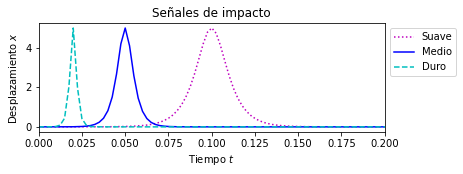

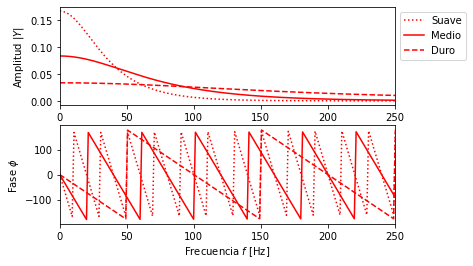

In [6]:
#1)Definición de las señales impactados

#Características del dominio del tiempo
#Número de puntos
N = 600;
#Espaciamiento temporal
T = 1/800; 
#Vector de tiempo
t = np.linspace(0, 2*N*T, N)

#Características de la señal de prueba
#Frecuencia natural de la señal
f = 20;                 
#Función de la señal de prueba
y1 = 5*(1/np.cosh(2*pi*f*t - 4*pi))
y2 = 5*(1/np.cosh(2*pi*(2*f)*t - 4*pi))
y3 = 5*(1/np.cosh(2*pi*(5*f)*t - 4*pi))

#2)Cálculo de la transformada de Fourier

#Aplicación de la DFT
Y11 = np.fft.fft(y1)
Y1 = Y11[range(int((N/2)))]
Y22 = np.fft.fft(y2)
Y2 = Y22[range(int((N/2)))]
Y33 = np.fft.fft(y3)
Y3 = Y33[range(int((N/2)))]

#Determinación de las frecuencias
freqq = np.fft.fftfreq(N, T)
freq = freqq[range(int(N/2))]

#Determinación de la fase en grados
fase1 = np.arctan2(Y1.imag, Y1.real) * 180 / np.pi
fase2 = np.arctan2(Y2.imag, Y2.real) * 180 / np.pi
fase3 = np.arctan2(Y3.imag, Y3.real) * 180 / np.pi

#3)Graficación

#Señal en el tiempo
plt.figure(figsize=(6.2,2))
plt.plot(t, y1, ':m', label='Suave')
plt.plot(t, y2, 'b', label='Medio')
plt.plot(t, y3, '--c', label='Duro')
plt.title('Señales de impacto')
plt.xlabel('Tiempo $t$')
plt.ylabel('Desplazamiento $x$')
plt.xlim(0, 0.2)
plt.legend(bbox_to_anchor=(1,1), loc=2)

#Espectro de frecuencia
fig, ax = plt.subplots(2, 1)
#Amplitud
#ATENCIÓN: Factor de normalización para el presente algoritmo es (2/N)
ax[0].plot(freq, (2/N) * np.abs(Y1), ':r', label='Suave') 
ax[0].plot(freq, (2/N) * np.abs(Y2), 'r', label='Medio') 
ax[0].plot(freq, (2/N) * np.abs(Y3), '--r', label='Duro') 
ax[0].set_xlim(0, 250)
ax[0].set_ylabel('Amplitud |$Y$|')
ax[0].legend(bbox_to_anchor=(1,1), loc=2)
#Fase
ax[1].plot(freq, fase1, ':r')
ax[1].plot(freq, fase2, 'r')
ax[1].plot(freq, fase3, '--r')
ax[1].set_xlabel('Frecuencia $f$ [Hz]')
ax[1].set_ylabel('Fase $\phi$')
ax[1].set_xlim(0, 250)

C:\Users\josue\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\josue\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\josue\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 0.2)

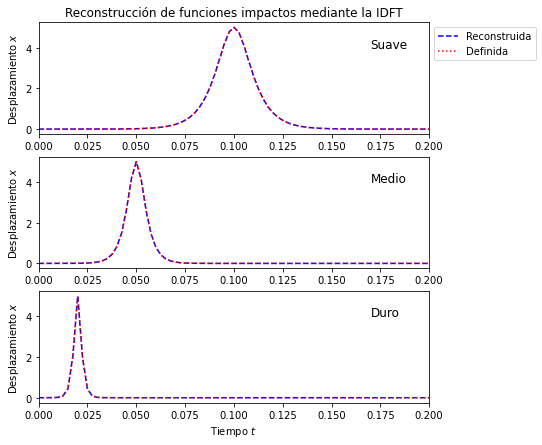

In [7]:
#4)Reconstrucción de las señales como sumatorias de funciones armónicas
#Aplicación de la transformada inversa de Fourier
yf1 = np.fft.ifft(Y11)
yf1 = yf1[range(int((N/2)))]
yf2 = np.fft.ifft(Y22)
yf2 = yf2[range(int((N/2)))]
yf3 = np.fft.ifft(Y33)
yf3 = yf3[range(int((N/2)))]
tf = t[range(int((N/2)))]

#Graficación de las funciones reconstruidas
fig, ax = plt.subplots(3, 1, figsize=(7,7))

#Impacto suave
ax[0].plot(tf, yf1, '--b', label='Reconstruida')
ax[0].plot(t, y1, ':r', label='Definida')
ax[0].set_ylabel('Desplazamiento $x$')
ax[0].legend(bbox_to_anchor=(1,1), loc=2)
ax[0].set_xlim(0, 0.2)
ax[0].set_title('Reconstrucción de funciones impactos mediante la IDFT')
ax[0].text(0.17, 4, 'Suave', fontsize=12)

#Impacto medio
ax[1].plot(tf, yf2, '--b', label='Reconstruida')
ax[1].plot(t, y2, ':r', label='Definida')
ax[1].set_ylabel('Desplazamiento $x$')
ax[1].set_xlim(0, 0.2)
ax[1].text(0.17, 4, 'Medio', fontsize=12)

#Impacto duro
ax[2].plot(tf, yf3, '--b', label='Reconstruida')
ax[2].plot(t, y3, ':r', label='Definida')
ax[2].set_ylabel('Desplazamiento $x$')
ax[2].set_xlabel('Tiempo $t$')
ax[2].text(0.17, 4, 'Duro', fontsize=12)
ax[2].set_xlim(0, 0.2)

**Cuarta parte:** Empleo de filtros en señales

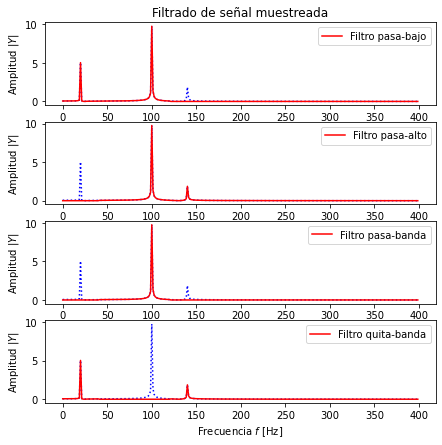

In [8]:
#Aplicación de filtros al espectro obtenido en la segunda parte

#1)Filtro pasa-bajo
n=0 #Inicio de contador
fcorte = 6*f
Y_pasabajo = np.zeros_like(Y)
for jj in range(n, int(N/2), 1):
    ff = freq[n]
    if ff <= fcorte:
        Y_pasabajo[jj] = (1)*Y[jj]
    else:
        Y_pasabajo[jj] = (0)*Y[jj]
    n += 1

#2)Filtro pasa-alto
n=0 #Inicio de contador
fcorte = 2*f
Y_pasaalto = np.zeros_like(Y)
for jj in range(n, int(N/2), 1):
    ff = freq[n]
    if ff <= fcorte:
        Y_pasaalto[jj] = (0)*Y[jj]
    else:
        Y_pasaalto[jj] = (1)*Y[jj]
    n += 1

#3)Filtro pasa-banda
Y_pasabanda = (Y_pasabajo + Y_pasaalto) - Y

#4)Filtro quita-banda
Y_quitabanda = Y - Y_pasabanda

#5)Gráficas de filtrado
fig, ax = plt.subplots(4, 1, figsize=(7,7))

#Pasa-bajo
ax[0].plot(freq, (2/N)*np.abs(Y), ':b')
ax[0].plot(freq, (2/N)*np.abs(Y_pasabajo), 'r', label='Filtro pasa-bajo')
ax[0].set_title('Filtrado de señal muestreada')
ax[0].set_ylabel('Amplitud |$Y$|')
ax[0].legend()

#Pasa-alto
ax[1].plot(freq, (2/N)*np.abs(Y), ':b')
ax[1].plot(freq, (2/N)*np.abs(Y_pasaalto), 'r', label='Filtro pasa-alto')
ax[1].set_ylabel('Amplitud |$Y$|')
ax[1].legend()

#Pasa-banda
ax[2].plot(freq, (2/N)*np.abs(Y), ':b')
ax[2].plot(freq, (2/N)*np.abs(Y_pasabanda), 'r', label='Filtro pasa-banda')
ax[2].set_ylabel('Amplitud |$Y$|')
ax[2].legend()

#Quita-banda
ax[3].plot(freq, (2/N)*np.abs(Y), ':b')
ax[3].plot(freq, (2/N)*np.abs(Y_quitabanda), 'r', label='Filtro quita-banda')
ax[3].set_ylabel('Amplitud |$Y$|')
ax[3].set_xlabel('Frecuencia $f$ [Hz]')
ax[3].legend()